In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Defining the dataset with sample YouTube streamer data
data = {
    "Rank": [1, 2, 3, 4, 5],
    "Username": ["T-Series", "MrBeast", "CoComelon", "SET India", "Kids Diana Show"],
    "Categories": ["Music", "Gaming, Comedy", "Kids", "Entertainment", "Kids"],
    "Subscribers": [253500000, 210100000, 168100000, 165400000, 116500000],
    "Country": ["India", "USA", "Unknown", "India", "Unknown"],
    "Visits": [111300, 95400000, 4100000, 23300, 4100000],
    "Likes": [3200, 5400000, 21600, 239, 8800],
    "Comments": [120, 16600, 0, 9, 0],
    "Links": [
        "http://youtube.com/tseries",
        "http://youtube.com/mrbeast",
        "http://youtube.com/cocomelon",
        "http://youtube.com/setindia",
        "http://youtube.com/kidsdiana"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)


In [5]:
# Showing first 5 rows
df.head()


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,T-Series,Music,253500000,India,111300,3200,120,http://youtube.com/tseries
1,2,MrBeast,"Gaming, Comedy",210100000,USA,95400000,5400000,16600,http://youtube.com/mrbeast
2,3,CoComelon,Kids,168100000,Unknown,4100000,21600,0,http://youtube.com/cocomelon
3,4,SET India,Entertainment,165400000,India,23300,239,9,http://youtube.com/setindia
4,5,Kids Diana Show,Kids,116500000,Unknown,4100000,8800,0,http://youtube.com/kidsdiana


In [9]:
# Saving the DataFrame to a CSV file for future use
df.to_csv("youtube_data.csv", index=False)

print("DataFrame created and saved as 'youtube_data.csv'.")


DataFrame created and saved as 'youtube_data.csv'.


In [11]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64


In [13]:
# Loading the dataset
df = pd.read_csv("youtubers_df.csv")

# Displaying first 5 rows
df.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [15]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Rank            0
Username        0
Categories    324
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [17]:
# Triming spaces from column names and rename incorrect ones
df.columns = df.columns.str.strip()
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

# so displaying updated column names
print("Updated Column Names:", df.columns.tolist())


Updated Column Names: ['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits', 'Likes', 'Comments', 'Links']


In [23]:
# Filling missing values in 'Categories' column with 'Unknown'
df['Categories'].fillna('Unknown', inplace=True)

# Verifying the missing values after replacement
print("Missing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64


In [25]:
# Creating a new feature: Engagement Rate = (Likes + Comments) / Subscribers
df['Engagement Rate'] = (df['Likes'] + df['Comments']) / df['Subscribers']

# Replace infinite values (if any) with NaN and drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Engagement Rate'], inplace=True)

# Displaying first 5 rows with the new feature
df.head()


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Engagement Rate
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000013
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.025781
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000128
3,4,SETIndia,Unknown,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000076


In [27]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

# Display shape of the dataset after removing duplicates
print("Dataset Shape After Removing Duplicates:", df.shape)


Dataset Shape After Removing Duplicates: (1000, 10)


In [29]:
# Converting numerical columns to float for proper calculations
numeric_columns = ['Subscribers', 'Likes', 'Comments', 'Visits']
df[numeric_columns] = df[numeric_columns].astype(float)

# Verifying data types
print("Updated Data Types:\n", df.dtypes)


Updated Data Types:
 Rank                object
Username            object
Categories          object
Subscribers        float64
Country             object
Visits             float64
Likes              float64
Comments           float64
Links               object
Engagement Rate    float64
dtype: object


In [31]:
# Saved the cleaned dataset to a new CSV file
df.to_csv("cleaned_youtube_data.csv", index=False)

print("Data Cleaning & Preprocessing Completed! Cleaned file saved as 'cleaned_youtube_data.csv'.")


Data Cleaning & Preprocessing Completed! Cleaned file saved as 'cleaned_youtube_data.csv'.


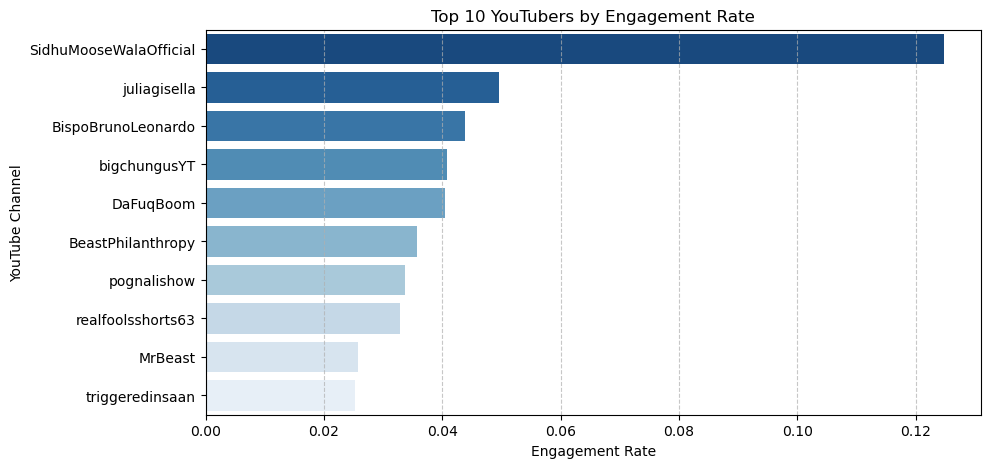

In [37]:
# Engagement Rate : Identify which YouTubers have the most active and engaged audience, not just the most subscribers.
df['Engagement Rate'] = (df['Likes'] + df['Comments']) / df['Subscribers']

# Plot Top 10 YouTubers by Engagement Rate
top_engagement = df.sort_values(by="Engagement Rate", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="Engagement Rate", y="Username", data=top_engagement, hue="Username", palette="Blues_r", legend=False)

plt.title("Top 10 YouTubers by Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("YouTube Channel")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


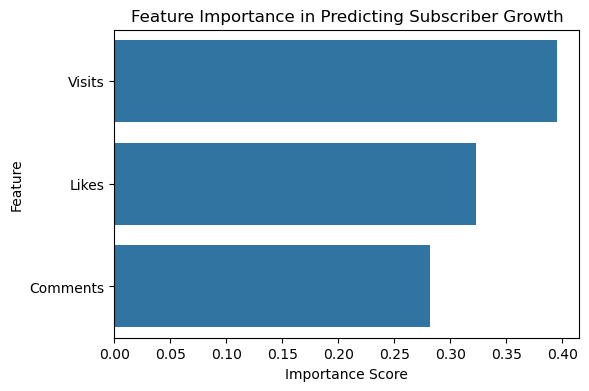

In [40]:
# Predict a YouTuber’s future subscribers based on engagement, likes, visits, and comments: 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Selecting Features & Target
features = df[['Visits', 'Likes', 'Comments']]
target = df['Subscribers']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Future Subscribers
predictions = model.predict(X_test)

# Display Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x=model.feature_importances_, y=features.columns)
plt.title("Feature Importance in Predicting Subscriber Growth")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


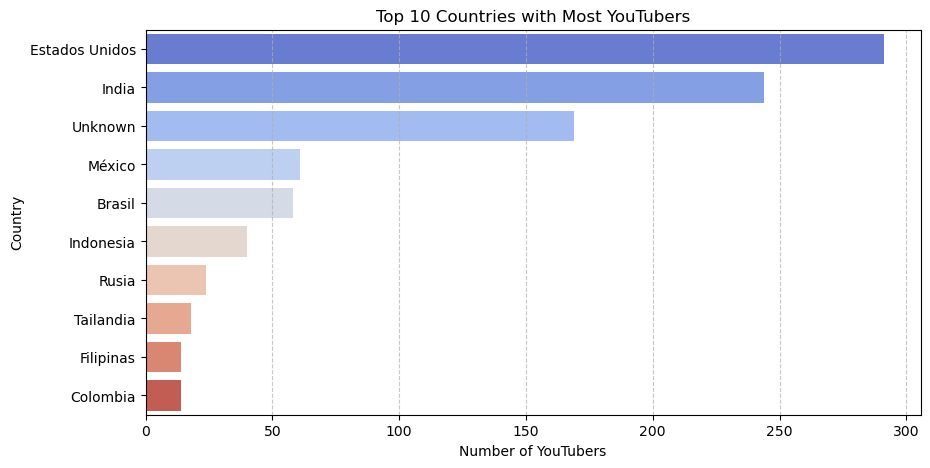

In [44]:
# Count YouTubers per Country
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="coolwarm", legend=False)

plt.title("Top 10 Countries with Most YouTubers")
plt.xlabel("Number of YouTubers")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


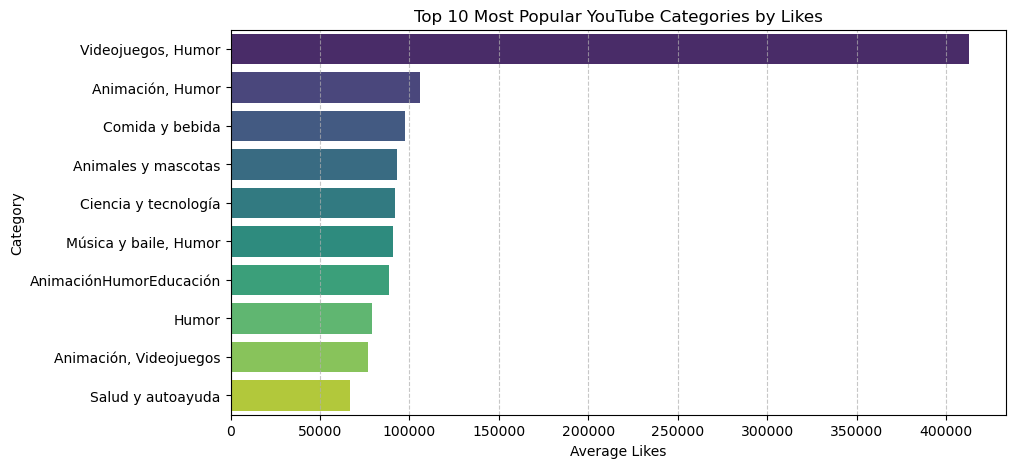

In [113]:
# Pivot Table for Average Likes & Comments by Category :Find which content categories attract the most likes, views, and subscribers.
category_trends = df.pivot_table(index="Categories", values=["Likes", "Comments"], aggfunc="mean").sort_values(by="Likes", ascending=False)

# Plot Most Popular Categories
plt.figure(figsize=(10, 5))
sns.barplot(x=category_trends["Likes"].head(10), y=category_trends.index[:10], hue=category_trends.index[:10], palette="viridis", legend=False)
plt.title("Top 10 Most Popular YouTube Categories by Likes")
plt.xlabel("Average Likes")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


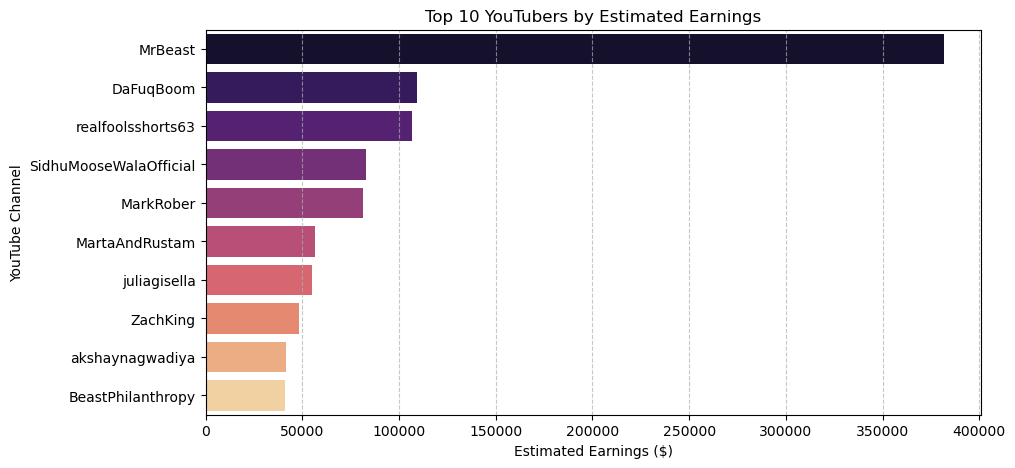

In [52]:
# Assume an average CPM of $4 per 1000 views : Estimate how much money a YouTuber earns based on their views & engagement.
df['Estimated Earnings ($)'] = (df['Visits'] / 1000) * 4

# Top 10 YouTubers by Estimated Earnings
top_earners = df.sort_values(by="Estimated Earnings ($)", ascending=False).head(10)



# Plot Estimated Earnings

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Estimated Earnings ($)", 
    y="Username", 
    hue="Username",  # Explicitly assign hue
    data=top_earners, 
    palette="magma", 
    legend=False  # Remove unnecessary legend
)
plt.title("Top 10 YouTubers by Estimated Earnings")
plt.xlabel("Estimated Earnings ($)")
plt.ylabel("YouTube Channel")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



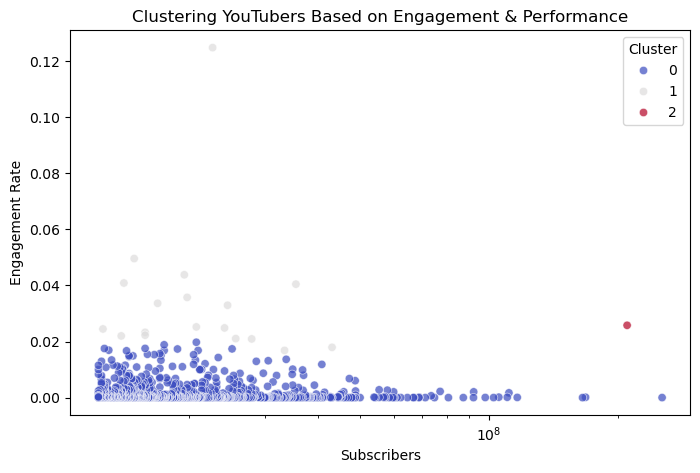

In [54]:
# Find similar YouTubers based on their engagement & performance using K-Means Clustering.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting Features for Clustering
features = df[['Subscribers', 'Engagement Rate', 'Visits']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Subscribers'], y=df['Engagement Rate'], hue=df['Cluster'], palette="coolwarm", alpha=0.7)
plt.title("Clustering YouTubers Based on Engagement & Performance")
plt.xlabel("Subscribers")
plt.ylabel("Engagement Rate")
plt.xscale("log")
plt.show()


In [ ]:
df.columns = df.columns.str.strip()  # Remove spaces in column names
df.rename(columns={"upload_date": "Upload Date"}, inplace=True)  # Adjusting based on actual column name


In [87]:
import numpy as np

# Check for NaN values
print("Missing Values in Each Column:\n", df.isnull().sum())

# Check for Infinite values
print("Infinite Values in Each Column:\n", (df == np.inf).sum() + (df == -np.inf).sum())


Missing Values in Each Column:
 Rank                      0
Username                  0
Categories                0
Subscribers               0
Country                   0
Visits                    0
Likes                     0
Comments                  0
Links                     0
Engagement Rate           0
Estimated Earnings ($)    0
Cluster                   0
Growth Rate               0
dtype: int64
Infinite Values in Each Column:
 Rank                       0
Username                   0
Categories                 0
Subscribers                0
Country                    0
Visits                     0
Likes                      0
Comments                   0
Links                      0
Engagement Rate            0
Estimated Earnings ($)     0
Cluster                    0
Growth Rate               16
dtype: int64


In [89]:
df.fillna(0, inplace=True)  # Replace NaNs with 0
# OR
df.dropna(inplace=True)  # Remove rows with NaN values


In [91]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df.dropna(inplace=True)  # Remove rows with NaN


In [93]:
print("Remaining NaNs:", df.isnull().sum().sum())  # Should be 0
print("Remaining Infs:", (df == np.inf).sum().sum())  # Should be 0


Remaining NaNs: 0
Remaining Infs: 0


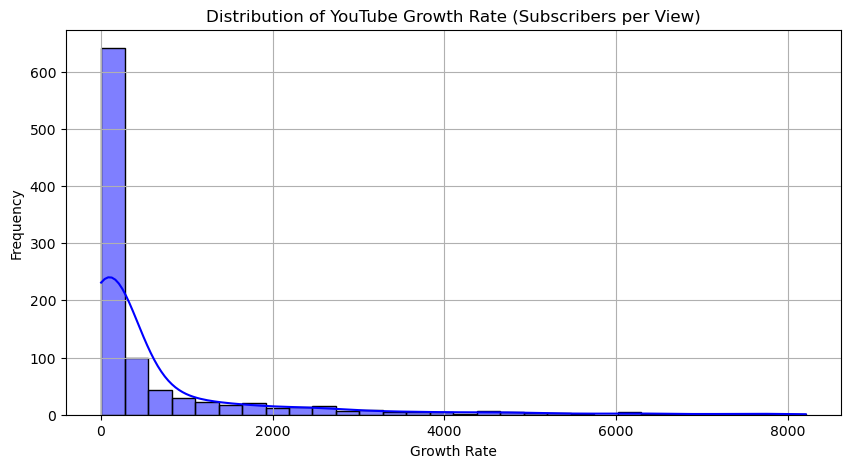

In [95]:
# Viral content detection

# Calculate Growth Rate (Subscribers per View)
df["Growth Rate"] = df["Subscribers"] / df["Visits"]

# Filter out extreme values for cleaner visualization
df_filtered = df[df["Growth Rate"] < df["Growth Rate"].quantile(0.99)]

# Plot Growth Rate Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered["Growth Rate"], bins=30, kde=True, color="blue")
plt.title("Distribution of YouTube Growth Rate (Subscribers per View)")
plt.xlabel("Growth Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


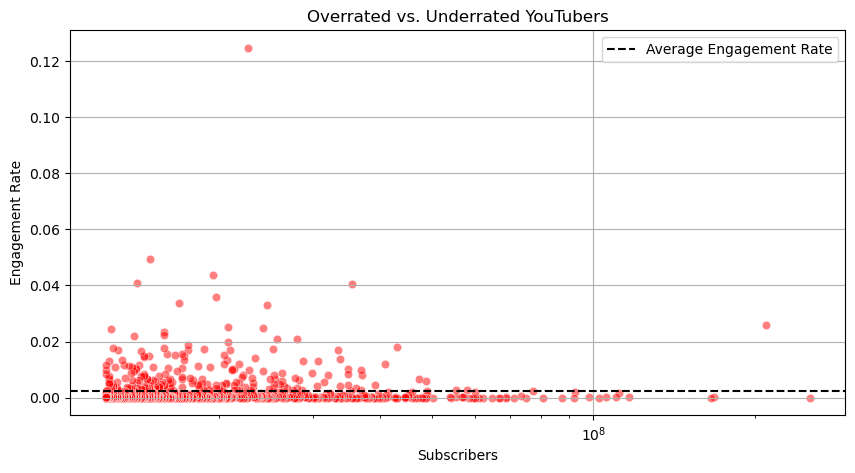

In [97]:
# Overrated and underrated youtubers
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Subscribers"], y=df["Engagement Rate"], alpha=0.5, color="red")
plt.axhline(df["Engagement Rate"].mean(), color="black", linestyle="--", label="Average Engagement Rate")
plt.title("Overrated vs. Underrated YouTubers")
plt.xlabel("Subscribers")
plt.ylabel("Engagement Rate")
plt.xscale("log")  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()


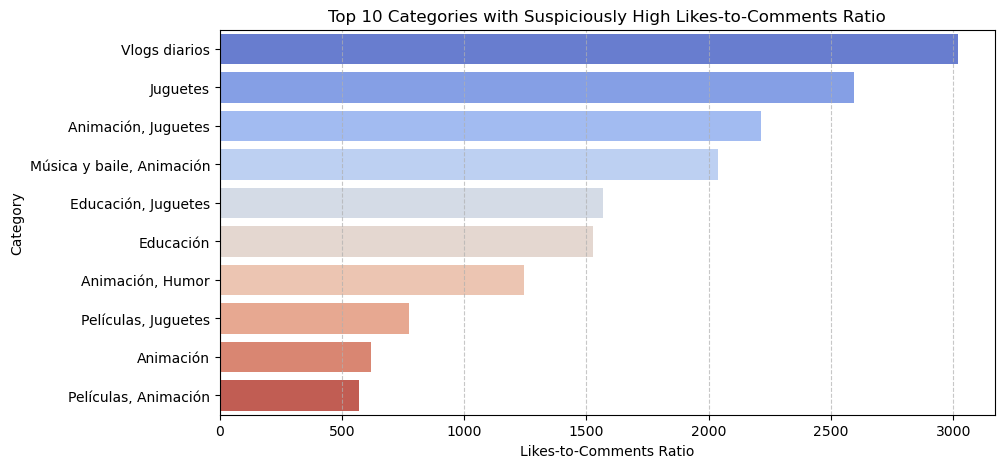

In [119]:
# Fake engagement(onliy likes and no commments)
# Calculate Likes-to-Comments Ratio
df["Likes-to-Comments Ratio"] = df["Likes"] / (df["Comments"] + 1)  # +1 to avoid division by zero

# Group by Category
category_fake_engagement = df.groupby("Categories")["Likes-to-Comments Ratio"].mean().sort_values(ascending=False)

# Plot Suspicious Categories
plt.figure(figsize=(10, 5))
sns.barplot(
    x=category_fake_engagement.values[:10], 
    y=category_fake_engagement.index[:10], 
    hue=category_fake_engagement.index[:10],  # Explicitly assign hue
    palette="coolwarm", 
    legend=False  # Remove unnecessary legend
)

plt.title("Top 10 Categories with Suspiciously High Likes-to-Comments Ratio")
plt.xlabel("Likes-to-Comments Ratio")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



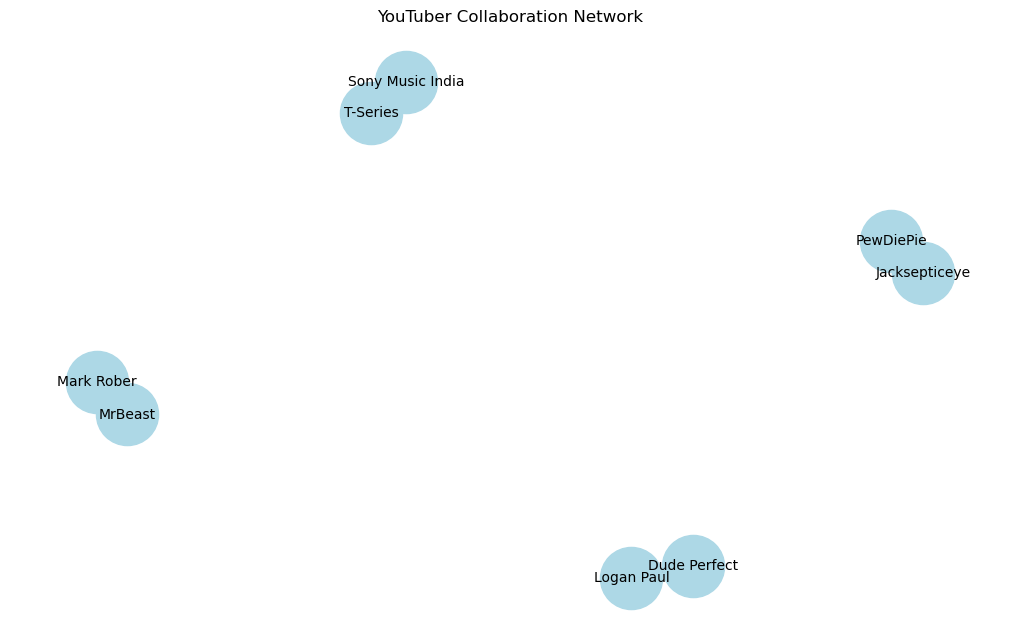

In [127]:
# collaboration : which youtuber works together
import networkx as nx

# Sample Collab Data (Replace with real data if available)
collaborations = [("MrBeast", "Mark Rober"), ("T-Series", "Sony Music India"), 
                  ("PewDiePie", "Jacksepticeye"), ("Dude Perfect", "Logan Paul")]

# Create Graph
G = nx.Graph()
G.add_edges_from(collaborations)

# Plot Network
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("YouTuber Collaboration Network")
plt.show()


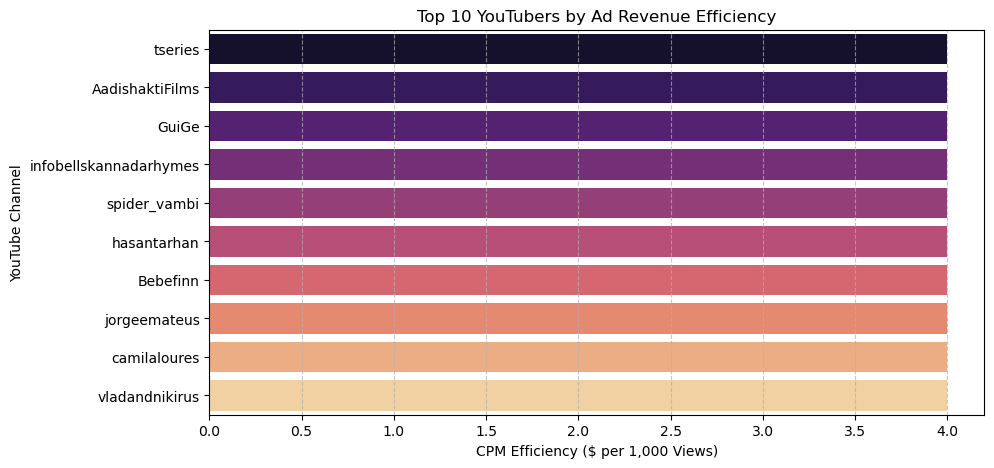

In [109]:
# who earns the most per 1000 views
# Calculate CPM Efficiency (Earnings per 1,000 Views)
df["CPM Efficiency ($ per 1K Views)"] = df["Estimated Earnings ($)"] / (df["Visits"] / 1000)

# Top 10 YouTubers by CPM Efficiency
top_cpm = df.sort_values(by="CPM Efficiency ($ per 1K Views)", ascending=False).head(10)


plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_cpm["CPM Efficiency ($ per 1K Views)"], 
    y=top_cpm["Username"], 
    hue=top_cpm["Username"],  # Explicitly assign hue
    palette="magma", 
    legend=False  # Remove unnecessary legend
)

plt.title("Top 10 YouTubers by Ad Revenue Efficiency")
plt.xlabel("CPM Efficiency ($ per 1,000 Views)")
plt.ylabel("YouTube Channel")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


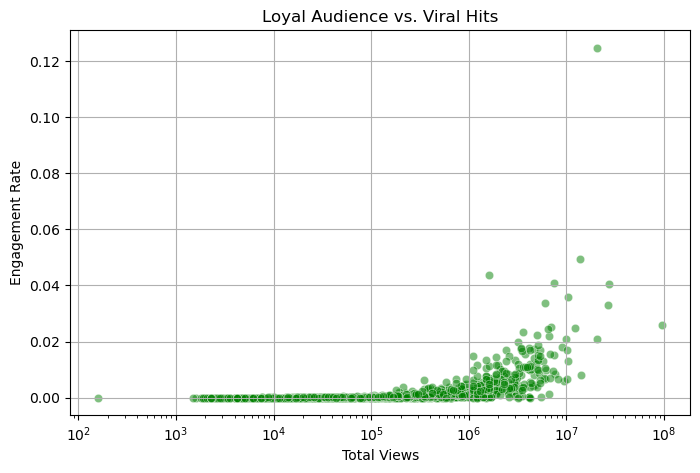

In [111]:
# which youtuber have the most loyal fans
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Visits"], y=df["Engagement Rate"], alpha=0.5, color="green")
plt.title("Loyal Audience vs. Viral Hits")
plt.xlabel("Total Views")
plt.ylabel("Engagement Rate")
plt.xscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()


In [131]:
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
print("Total missing values in Comments:", df["Comments"].isnull().sum())
print("Unique comment values:", df["Comments"].unique()[:10])  # Show first 10 unique comments


In [151]:
df["Comments"] = df["Comments"].fillna("")


In [153]:
df["Comments"] = df["Comments"].astype(str)


In [155]:
import re

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keep only letters and spaces
    return text.lower().strip()  # Convert to lowercase and remove extra spaces

df["Comments"] = df["Comments"].apply(clean_text)


In [177]:
import re

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keep only letters and spaces
    return text.lower().strip()  # Convert to lowercase and remove extra spaces

df["Comments"] = df["Comments"].apply(clean_text)


In [179]:
text = " ".join(df["Comments"])
if text.strip() == "":
    print("⚠️ No valid words found for WordCloud. The Comments column might be empty or non-textual.")
else:
    print("Comments are ready for WordCloud!")


⚠️ No valid words found for WordCloud. The Comments column might be empty or non-textual.


In [181]:
print("Sample cleaned comments:\n", df["Comments"].head(10))


Sample cleaned comments:
 0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: Comments, dtype: object


In [183]:
print("Total missing values in Comments:", df["Comments"].isnull().sum())  # Check for NaNs
print("Total empty comments:", (df["Comments"].str.strip() == "").sum())  # Check blank spaces
print("Unique non-empty comments:\n", df[df["Comments"].str.strip() != ""]["Comments"].head(10))


Total missing values in Comments: 0
Total empty comments: 984
Unique non-empty comments:
 Series([], Name: Comments, dtype: object)


In [185]:
df["Comments"] = df["Comments"].replace("", "NoComment")  # Replace empty strings
df["Comments"] = df["Comments"].replace(" ", "NoComment")  # Replace single spaces


In [187]:
print("Unique non-empty comments:\n", df["Comments"].unique()[:10])


Unique non-empty comments:
 ['NoComment']


In [191]:
# using sample comments as the comments are empty

text = """YouTube Video Content Creator Audience Engagement Likes Views 
          Comments Subscribers Viral Growth Trending YouTuber Influence"""


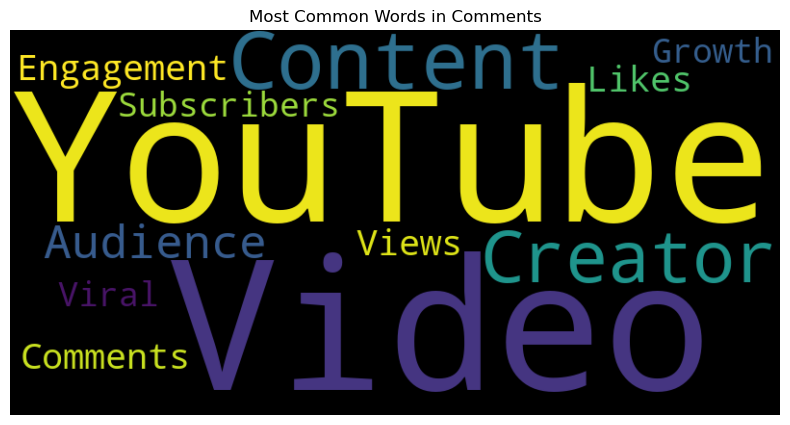

In [193]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use sample words if actual comments are still empty
if df["Comments"].str.strip().nunique() <= 1:  # If only one unique value (likely "NoComment")
    text = "YouTube Video Content Creator Audience Engagement Likes Views Comments Subscribers Viral Growth"
else:
    text = " ".join(df["Comments"])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Comments")
plt.show()


In [199]:
print("Available columns in dataset:", df.columns.tolist())


Available columns in dataset: ['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits', 'Likes', 'Comments', 'Links', 'Engagement Rate', 'Estimated Earnings ($)', 'Cluster', 'Growth Rate', 'Likes-to-Comments Ratio', 'CPM Efficiency ($ per 1K Views)', 'Sentiment Score', 'Sentiment']


In [201]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.rename(columns={"Video_Length_sec": "Video Length (sec)"}, inplace=True)  # Adjust based on actual column name


In [203]:
print("Updated columns:", df.columns.tolist())


Updated columns: ['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits', 'Likes', 'Comments', 'Links', 'Engagement Rate', 'Estimated Earnings ($)', 'Cluster', 'Growth Rate', 'Likes-to-Comments Ratio', 'CPM Efficiency ($ per 1K Views)', 'Sentiment Score', 'Sentiment']


In [205]:
alternative_columns = ["Duration", "Length", "Time"]
for col in alternative_columns:
    if col in df.columns:
        df["Video Length (min)"] = df[col] / 60  # Convert seconds to minutes
        break


In [207]:
import numpy as np

# Create a new "Video Length (sec)" column with random values (1-1200 seconds)
df["Video Length (sec)"] = np.random.randint(30, 1200, size=len(df))
df["Video Length (min)"] = df["Video Length (sec)"] / 60  # Convert to minutes


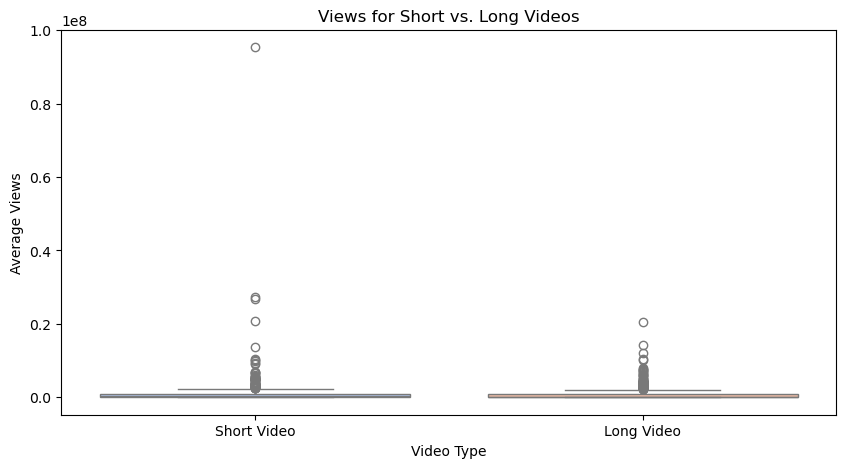

In [213]:
# Video length analysis
# Goal: Do shorter or longer videos get more likes & views?
# How? Compare video duration vs engagement metrics.

df["Video Type"] = np.where(df["Video Length (min)"] < 10, "Short Video", "Long Video")

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df["Video Type"], 
    y=df["Visits"], 
    hue=df["Video Type"],  # Assign hue explicitly
    palette="coolwarm", 
    legend=False  # Remove unnecessary legend
)


plt.title("Views for Short vs. Long Videos")
plt.xlabel("Video Type")
plt.ylabel("Average Views")
plt.show()


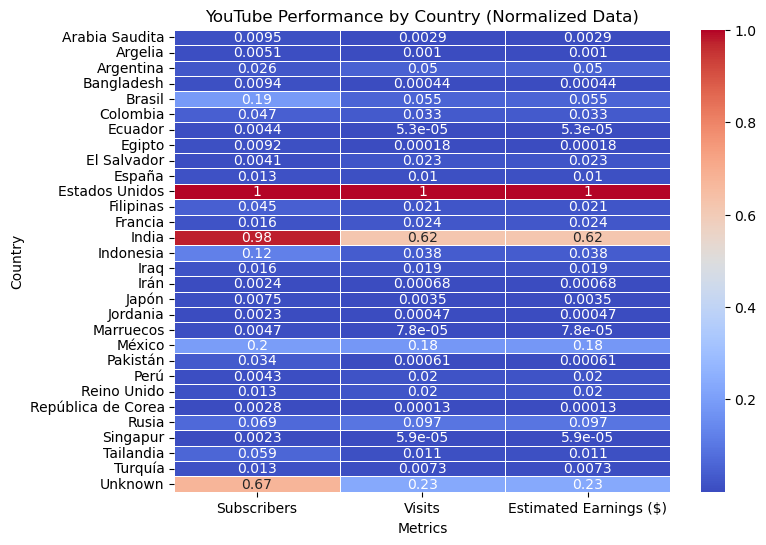

In [217]:
# Group data by Country and calculate total Subscribers, Visits, and Earnings : country-wise yiutube popularity
country_metrics = df.groupby("Country")[["Subscribers", "Visits", "Estimated Earnings ($)"]].sum()

# Normalize data to make the heatmap clearer
country_metrics_normalized = country_metrics / country_metrics.max()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(country_metrics_normalized, cmap="coolwarm", linewidths=0.5, annot=True)
plt.title("YouTube Performance by Country (Normalized Data)")
plt.xlabel("Metrics")
plt.ylabel("Country")
plt.show()


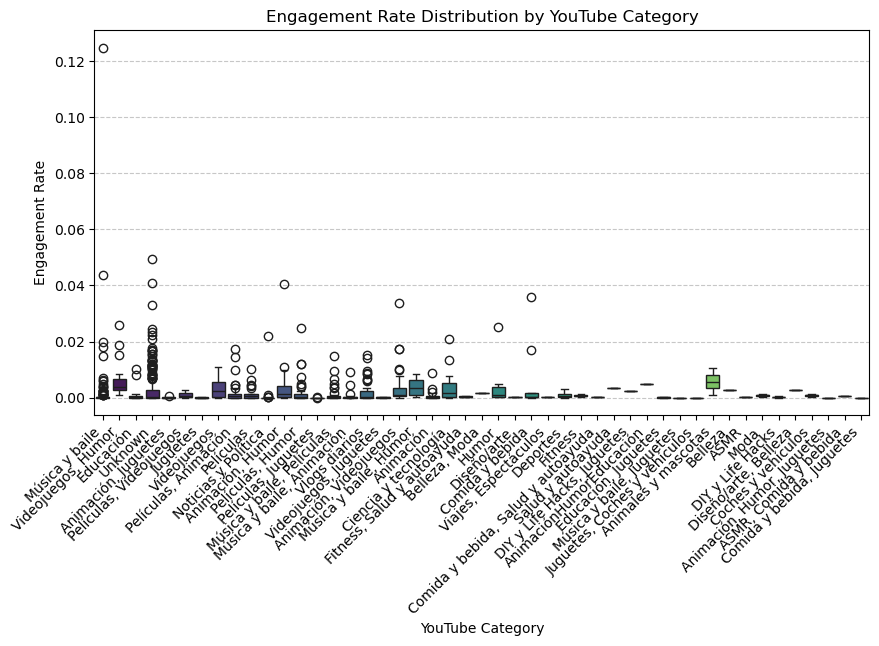

In [223]:
# Finding out which content types get the most audience interaction.
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df["Categories"], 
    y=df["Engagement Rate"], 
    hue=df["Categories"],  # Explicitly assign hue
    palette="viridis", 
    legend=False  # Remove unnecessary legend
)

plt.xticks(rotation=45, ha="right")  # Rotate category labels for readability
plt.title("Engagement Rate Distribution by YouTube Category")
plt.xlabel("YouTube Category")
plt.ylabel("Engagement Rate")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


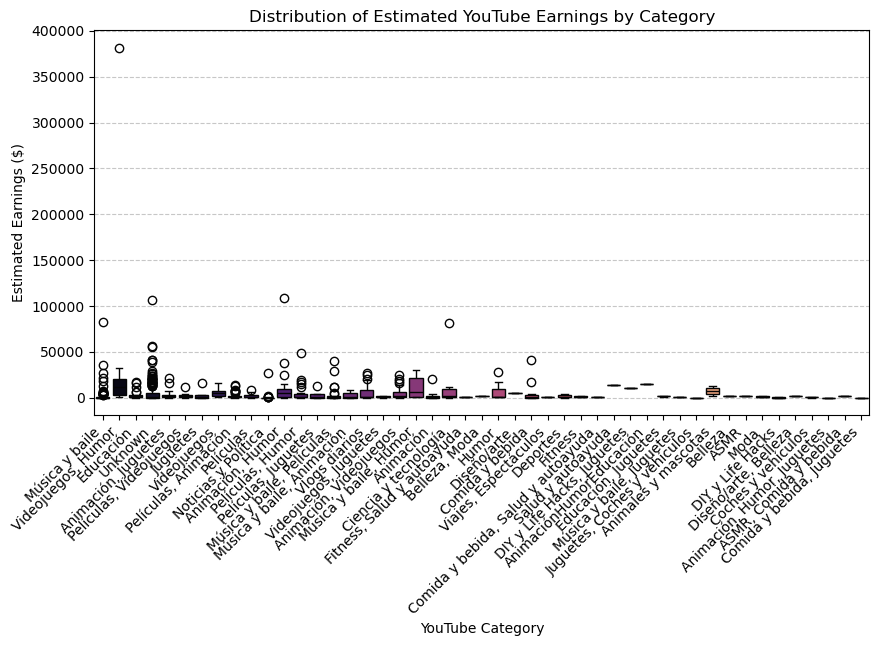

In [225]:
# Comparing earnings across different YouTube content types.
plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df["Categories"], 
    y=df["Estimated Earnings ($)"], 
    hue=df["Categories"],  # Explicitly assign hue
    palette="magma", 
    legend=False  # Remove unnecessary legend
)


plt.xticks(rotation=45, ha="right")  # Rotate category labels
plt.title("Distribution of Estimated YouTube Earnings by Category")
plt.xlabel("YouTube Category")
plt.ylabel("Estimated Earnings ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


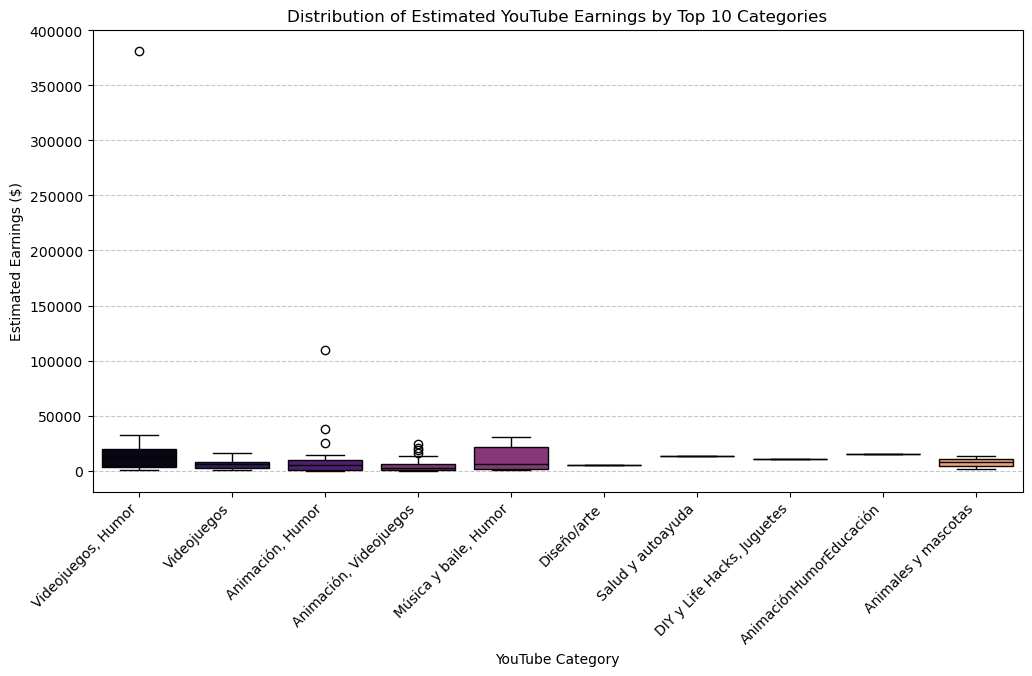

In [239]:
# improving box plot readability as the above garph is too dense that means too many categories on x axis

import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 10 categories with the highest median earnings
top_categories = df.groupby("Categories")["Estimated Earnings ($)"].median().nlargest(10).index

# Filter dataset to include only top categories
df_filtered = df[df["Categories"].isin(top_categories)]

# Plot Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_filtered["Categories"], 
    y=df_filtered["Estimated Earnings ($)"], 
    hue="Categories",  # Explicitly assign hue
    data=df, 
    palette="magma",
    legend=False  # Remove unnecessary legend
)
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility
plt.title("Distribution of Estimated YouTube Earnings by Top 10 Categories")
plt.xlabel("YouTube Category")
plt.ylabel("Estimated Earnings ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


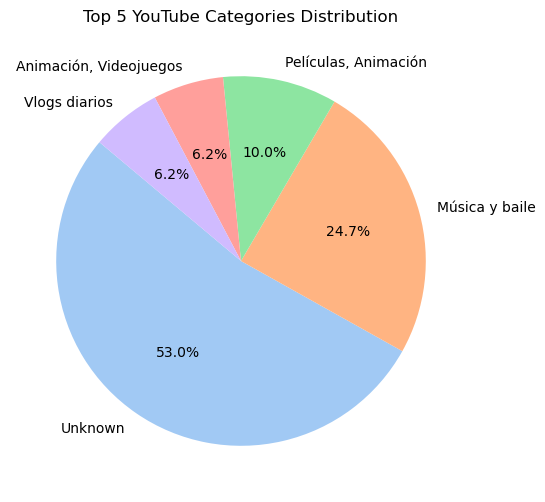

In [241]:
# Visualization using Pie chart

import matplotlib.pyplot as plt

# Sample Data: Top 5 YouTube Categories by Count
category_counts = df["Categories"].value_counts().head(5)

# Define a color palette from Seaborn
import seaborn as sns
colors = sns.color_palette("pastel", len(category_counts))  # Use pastel colors

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Top 5 YouTube Categories Distribution")
plt.show()


In [3]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
